In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from pylab import *
from io import StringIO
from statistics import *
import subprocess


# Esperienza 2: Apparato per lo studio delle leggi sui gas 
**Data**: 16 Novembre 2019 
**Gruppo**: (V) Ivan Ingrosso , Antonio Gonzalez, Pietro Garofalo


## Materiale

- **Sistema pistone-cilindro** Il pistone in grafite scorre nel cilindro in pyrex in condizioni di quasi totale assenza di attrito. L'apparato possiede connettori a baionetta a bloccaggio rapido (ciascuno dotato di una valvola di blocco a scatto) che permettono di collegare il sistema con l'esterno con un sistema di tubi; 
- **Sensore di posizione angolare** Il sensore di posizione angolare mod CI-6538 permette di misurare lo spostamento lineare del pistone all'interno del cilindro. Questo permette di ricavare la variazione di volume del gas all'interno del sistema;
- **Sensore di bassa pressione** Il sensore di bassa pressione mod CI-6605 permette di misurare la pressione del gas all'interno del cilindro;
- **Sensore di temperatura** Il sensore di temperatura viene mod CI-6605 viene inserito nella camera di espansione.

|Strumenti| Divisione| Portata |
|---------:|:-----------------|:-------------|
|Sensore posizione angolare (mod. CI-6538)|$\frac{1}{1440}$ di giro    | -- |
|Sensore di temperatura (acciaio, mod CI-6605)| $0.05^{\circ}C$ | -- |
|Sensore di bassa pressione (mod. CI-6605)| $0.005 KPa$ |10 KPa|
|Bilancia | $0.1 g$ | -- |
|Calorimetri| -- | $1 l$ |

## 1.1 Verifica della legge di Boyle (trasformazione isoterma)

### Relazioni di base per il processo ideale
La legge di Boyle afferma che dato in un sistema termodinamico costituito da $n$ moli di un gas perfetto, le cui variabili termiche volume, pressione e temperatura assumono, ripettivmente, i valori  $(V_{0}, P_{0}, T_{0})$, il prodotto tra la pressione e il volume si mantiene costante quando si sottopone il sistema a una trasformazione in cui non si ha variazione di temperatura. Questo vuol dire che, se dopo la trasformazione (che, nelle condizioni in cui la temperatura è costante, viene detta isoterma) i valori assunti dalle variabili termodinamiche sono $(V_{1}, P_{1}, T_{0})$, allora $$V_{0}P_{0} = V_{1}P{1} = nRT$$ Per piccole variazione di pressione intorno a $P_{0} = 1  Atm = 101.3 KPa$, è possibile espandere, al primo ordine, l'espressioe che esprime $V$ in funzione di $P$ \(ipotesi fondementale è che il sistema non sia soggetto a perdite: quindi, oltre alla temperatura $T$, anche il numero di moli $n$ viene mantenuto costante \)  
$$V_{P} = \frac{nRT_{0}}{P} = \frac{nRT_{0}}{P_{0}} + \frac{nRT_{0}}{P_{0}^2}(P-P_{0})$$
Detto $V_{0} = V_{P_{0}} = \frac{nRT_{0}}{P_{0}}$, $\Delta_{V}= V_{P} - V_{0}$ e $\Delta_{P} = P-P_{0}$, è possibile scrivere l'espressione precedente nella formula più compatta $$ \Delta_{V} = -\frac{V_{0}}{P_0} \Delta_{P} $$

Per misurare il $\Delta V$ ussiamo che la superficie delle cilindre e constante per tanto, $\Delta V = S\cdot\Delta x$

Anche il nostro dati della x e inverso per tanto facciamo $x=-x$

### Procedimento di misura
Per la raccolta dei dati, la realizzazione delle tabelle contenenti i dati stessi e l'interpolazione di questi ultimi, è stato utilizzato il softwer Data Studio. Prima della raccolta, si è disposto il sistema secondo la seguente configurazione: 
- Cilindro in posizione orizzontale (sottoposto quindi alla sola pressione atmosferica);
- Sensore di pressione collegato all'inerfaccia, assumendo come P_{0}=0 la pressione atmosferica;
- Pistone collegato alla puleggia del sensore di rotazione attraverso un filo mantenuto in tensione tramite una massa; 
- Sensore di posizione collegato all'interfaccia; 
- Impostazione del softwer in modo da registrare la misura di spostamento in funzione della pressione.  

A questo punto, impostato il pistone ad una determinata posizione $x_{0}$ (utile per poter effettuare dei controlli sui valori ottenuti, attraverso calcoli manuali), esercitando una leggera pressione su quest ultimo in modo da comprirmelo lentamente e con continuità, si è ricavato l'anadmento di $x$ in funzione di $P$; Quello che ci si aspetta è che i dati si distribuiscano come una retta con coefficiente angolare $b = \frac{V_{0}}{P_{0}}$. Eseguendo un fit sui dati raccolti si calcola il valore di b. 
Poichè la superficie del cilindro \($S$\) è constante,è possibile ricavare il valore di $\Delta_{V}$ da $\Delta_{x}$, $$\Delta V = S\cdot\Delta x$$
(Anche il nostro dati della x e inverso per tanto facciamo $x=-x$) perchè sono inversi?????


### Dati 
`deltaX`: variazione de longitude \[m\]  
`deltaP`: variazione di pressione \[KPa \]    
`DP`: risoluzione del sensore de pressione \[KPa \]   
`deltaV`: \[l\]

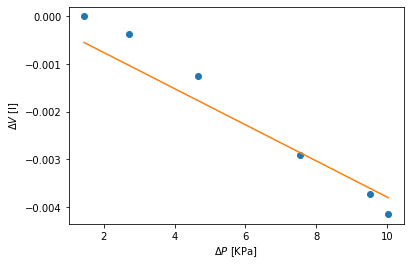

Il coeficiente angolare è 0.0003788556358872155 l/KPa


In [9]:
s = open("esperimento1.1.txt").read().replace(",", ".")
S = np.pi*(0.0325/2)**2
P0 = 101.325 ###KPa
deltaP,deltaX = transpose(loadtxt(StringIO(s)))
deltaX = -deltaX
deltaV = [S*deltaX[i]*1e3 for i in np.arange(0,np.size(deltaX),1)] 
DP= 0.005
dP=DP/sqrt(12)*np.ones_like(deltaP)
def fit_func(P,b):
    return -b*P
params,pcov = curve_fit(fit_func, deltaP,deltaV , sigma=dP, absolute_sigma=True)
b= params
plot(deltaP, deltaV, "o")
plot(deltaP, fit_func(deltaP,b))
xlabel("$\Delta P$ [KPa]")
ylabel("$\Delta V$ [l]")
plt.show()
b_text = 'Il coeficiente angolare è {} l/KPa'.format(float(b))
print(b_text)

### Verifica teoria 
Come controllo sul valore di b ottenuti si confronta il volume inziale $V_{0}$ registrato con quello ricavabile tramite il fit. Inoltre, per una migliore stima di $V_{0}$ si è tenuto conto del gas contenuto nei due tubi. 

In [7]:
#####Calcolo V0 teorico######
X0 = 0.05
V0_cilindri = X0*S ####m^3###
tubo1 = 0
tubo2 = 0 
V0_teorico = V0_cilindri + tubo1 + tubo2
V0_experimental = float(b*P0)
V0_teorico_text = 'Il volumen teorico e {} l'.format(V0_teorico*1e3)
V0_experimental_text = 'Il volumen espermientale e {} l'.format(V0_experimental)
print(V0_experimental_text)
print(V0_teorico_text)

Il volumen espermientale e 0.03838754730627211 l
Il volumen teorico e 0.041478840504427746 l


## 1.2 Verifica della legge di Charles (trasformazione isobara)

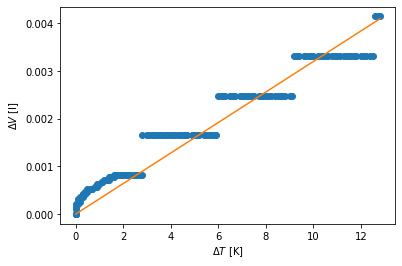

Il coeficiente angolare e 0.00032026507468403063 l/K
Il numero de moli espermientale e 0.0039056716424881784 moli
Il numero di moli teorico e 0.12061005468413581 moli


In [26]:
s = open("Esperienza2.txt").read().replace(",", ".")
S = np.pi*(0.0325/2)**2
P0 = 1 ###atm
R = 0.082 #####atm*l/mol*k
T,deltaX = transpose(loadtxt(StringIO(s)))
deltaV = [S*deltaX[i]*1e3 for i in np.arange(0,np.size(deltaX),1)]
deltaT = T-T[0] 
DT= 0.05
dP=DT/sqrt(12)*np.ones_like(deltaT)
def fit_func(T,b):
    return b*T
params,pcov = curve_fit(fit_func, deltaT,deltaV , sigma=dP, absolute_sigma=True)
b= params
plot(deltaT, deltaV, "o")
plot(deltaT, fit_func(deltaT,b))
xlabel("$\Delta T$ [K]")
ylabel("$\Delta V$ [l]")
plt.show()
n_experimental = float(b*P0/R)
b_text = 'Il coeficiente angolare e {} l/K'.format(float(b))
n_experimental_text = 'Il numero de moli espermientale e {} moli'.format(n_experimental)
print(b_text)
print(n_experimental_text)


#####Calcolo V0 teorico######
X0 = 0.02
V0_cilindri = X0*S ####m^3###
tubo1 = 0.0001
tubo2 = 0.0001 
V0_teorico = V0_cilindri + tubo1 + tubo2

n_teorico_text = 'Il numero di moli teorico e {} moli'.format(P0*V0_teorico*1e3/(R*T[0]))

print(n_teorico_text)

## 1.3 Verifica della legge di Gay-Lussac (trasformazione isocora)

Il numero di moli teorico e 0.11635948006971694 moli
Il coeficiente angolare e 0.7143517904207803 KPa/K
Il numero de moli espermientale e 0.018618838950147105 moli


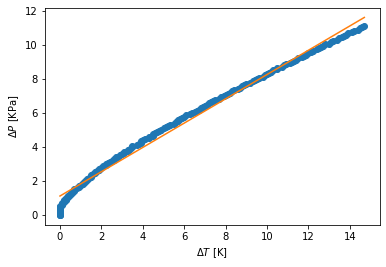

In [35]:
#####Calcolo V0 teorico######
X0 = 0.02
V0_cilindri = X0*S ####m^3###
tubo1 = 0.0001
tubo2 = 0.0001 
V0_teorico = V0_cilindri + tubo1 + tubo2   ###m^3

n_teorico_text = 'Il numero di moli teorico e {} moli'.format(1*V0_teorico*1e3/(0.082*T[0]))

print(n_teorico_text)
################################
s = open("Esperienza3.txt").read().replace(",", ".")
S = np.pi*(0.0325/2)**2
P0 = 101.325 ###KPa
R = 8.31 #####J/mol*k
T,deltaP = transpose(loadtxt(StringIO(s)))
deltaT = T-T[0] 
def fit_func(T,b,a):
    return b*T+a
params,pcov = curve_fit(fit_func, deltaT,deltaP)
b,a= params
plot(deltaT, deltaP, "o")
plot(deltaT, fit_func(deltaT,b,a))
xlabel("$\Delta T$ [K]")
ylabel("$\Delta P$ [KPa]")
plt.show()
n_experimental = float(b*V0_teorico*1e3/R)
b_text = 'Il coeficiente angolare e {} KPa/K'.format(float(b))
n_experimental_text = 'Il numero de moli espermientale e {} moli'.format(n_experimental)
print(b_text)
print(n_experimental_text)



## 1.4 Trasformazione calore-lavoro: realizzazione di un ciclo termico

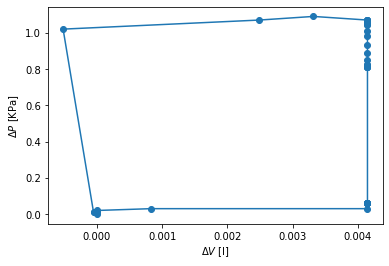

0.005453125000000001


In [68]:
################################
s = open("ciclo2.txt").read().replace(",", ".")
S = np.pi*(0.0325/2)**2
P0 = 101.325 ###KPa
R = 8.31 #####J/mol*k
deltaX,deltaP = transpose(loadtxt(StringIO(s)))
deltaV = [S*deltaX[i]*1e3 for i in np.arange(0,np.size(deltaX),1)]
plot(deltaV, deltaP,'-o')
xlabel("$\Delta V$ [l]")
ylabel("$\Delta P$ [KPa]")
plt.show()
###Non so como calcolare il area####